In [16]:
# Dependencies
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import and_
from sqlalchemy import Column, Float, Integer, String


# Reflect Database into ORM class
engine = create_engine("sqlite:///hawaii.sqlite") 
Base = automap_base()
Base.prepare(engine, reflect=True)


Measurement = Base.classes.measurements
Station = Base.classes.stations


session = Session(engine)    



<IPython.core.display.Javascript object>


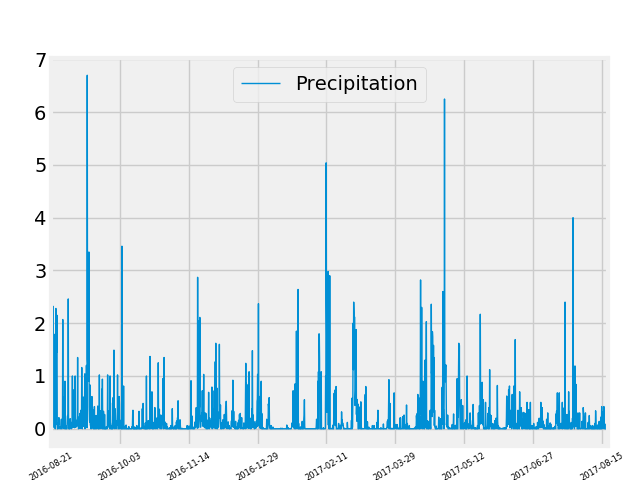

In [79]:
#Precipitation Analysis
# Date range = 2016-08-21 to 2017-08-21

year_rain = session.query(Measurement.date, Measurement.prcp).\
    filter(and_(Measurement.date >= "2016-08-21", Measurement.date <= "2017-08-21")).all()
year_rain_df = pd.DataFrame(year_rain, columns=['Date', 'Precipitation'])
year_rain_sort_df=year_rain_df.sort_values(['Date'])
year_rain_sort_df.set_index(['Date'], inplace=True)
year_rain_sort_df.plot(linewidth=1);
plt.xticks(rotation=30,fontsize=6)
plt.show()

In [80]:
# Summary stats for year selected

year_rain_df.describe()

,Precipitation
count,2024.000000
mean,0.180099
std,0.464528
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [86]:
# Station count

total_stations = session.query(Station.station).count()
print("Total Stations = " , total_stations)

Total Stations =  9


In [120]:
#List of stations and observation counts in descending order

session.query(Measurement.station, func.count(Measurement.prcp)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.prcp).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

#### Station USC00519281 had the largest number of observations.

<IPython.core.display.Javascript object>


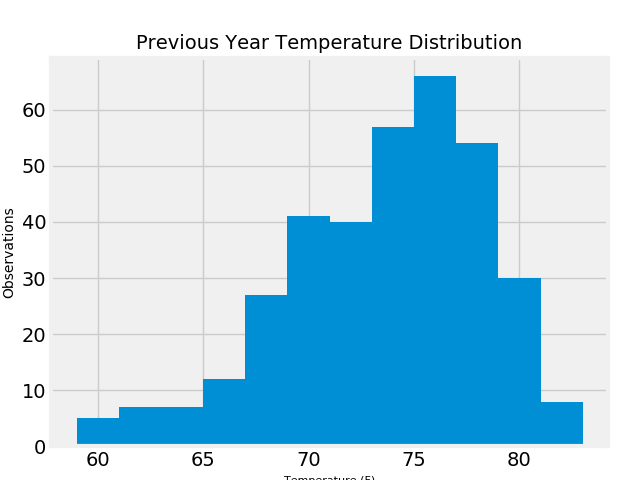

In [190]:
# Query to retrieve the last 12 months of temperature observation data (tobs)

year_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(and_(Measurement.date >= "2016-08-21", Measurement.date <= "2017-08-21",Measurement.station == 'USC00519281')).all()
year_temps_df = pd.DataFrame(year_temps, columns=['Date', 'Temperature'])
year_temps_sort_df=year_temps_df.sort_values(['Date'])
year_temps_sort_df.set_index(['Date'], inplace=True)
year_temps_sort_df.hist(bins=12);
plt.title("Previous Year Temperature Distribution",fontsize=14)
plt.ylabel("Observations", fontsize = 10)
plt.xlabel("Temperature (F)",fontsize = 8 )
plt.show()    

<IPython.core.display.Javascript object>


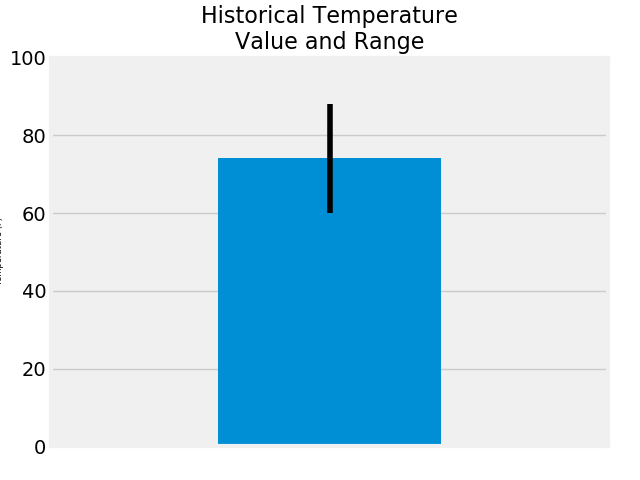

In [193]:
#Temperature Analysis


# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates.

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    
#Calculate the min, avg, and max temperatures for trip using the matching dates from the previous year

pre_trip_year = calc_temps('2015-12-20', '2016-12-20')
p_2_p = (pre_trip_year[0][0]-pre_trip_year[0][2])/2

plt.xlim(0,2)
plt.ylim(0,100)
plt.bar(1,pre_trip_year[0][1],yerr = p_2_p)
plt.xticks([])
plt.title("Historical Temperature\nValue and Range",fontsize=16)
plt.ylabel("Temperature (F)", fontsize= 6)

plt.show()